# Practice Exercise Linear Regression
Welcome to the practice exercise on Linear Regression. We strongly recommend you try out all the questions/steps mentioned here and refer to the solution notebook later.

## Case Study: Boston Housing Price Prediction

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM:     per capita crime rate by town
- ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:    proportion of non-retail business acres per town
- CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX:      nitric oxides concentration (parts per 10 million)
- RM:       average number of rooms per dwelling
- AGE:      proportion of owner-occupied units built prior to 1940
- DIS:      weighted distances to five Boston employment centres
- RAD:      index of accessibility to radial highways
- TAX:      full-value property-tax rate per 10,000 dollars
- PTRATIO:  pupil-teacher ratio by town
- LSTAT:    %lower status of the population
- MEDV:     Median value of owner-occupied homes in 1000 dollars.


**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### <a id = "link1">Load the dataset</a>

In [6]:
boston = pd.read_csv('Boston.csv')

**Check the shape of the dataset**

In [7]:
boston.shape

(506, 13)

**Get the info data types column wise**

In [9]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Get summary statistics around the numerical columns**

In [10]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Univariate and Bivariate Analysis
Plot the distplots for the features and then plot scatterplots for features and the target variable 

To do - Identify insights if any from the distributuions.

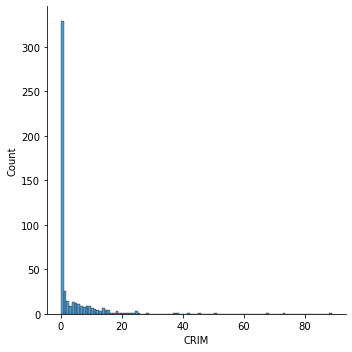

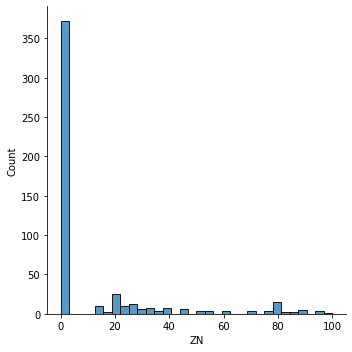

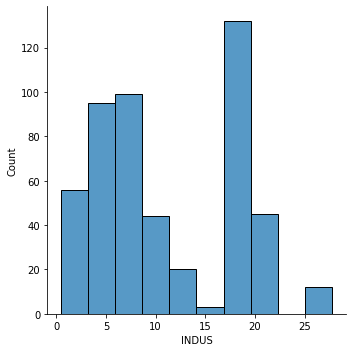

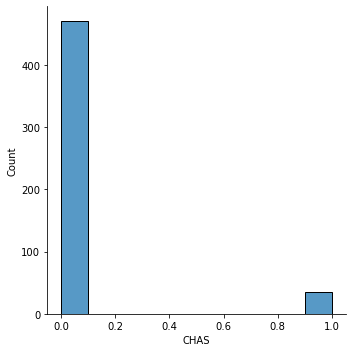

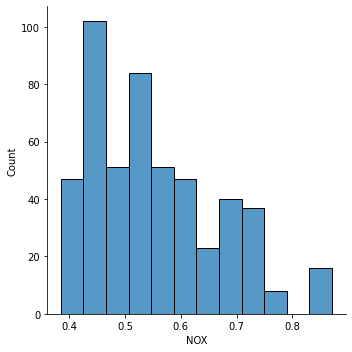

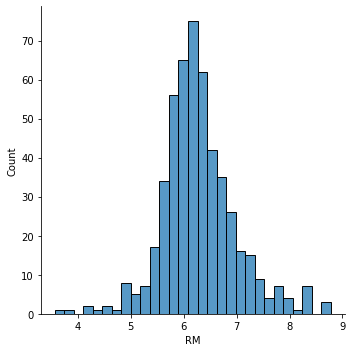

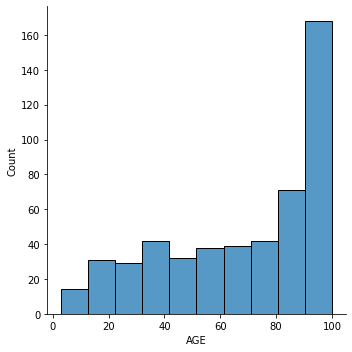

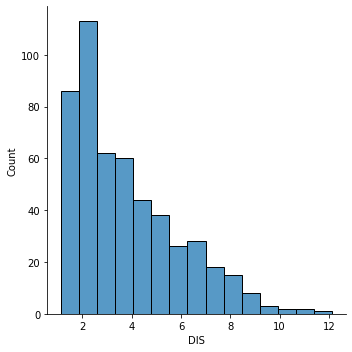

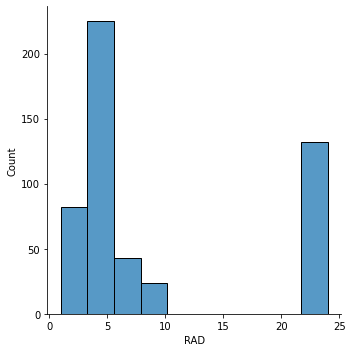

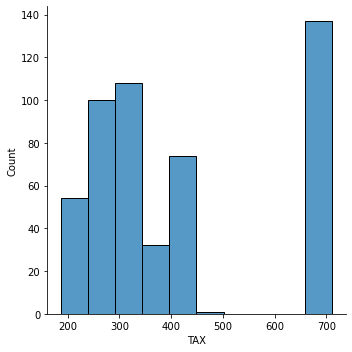

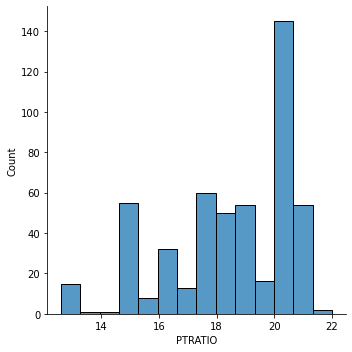

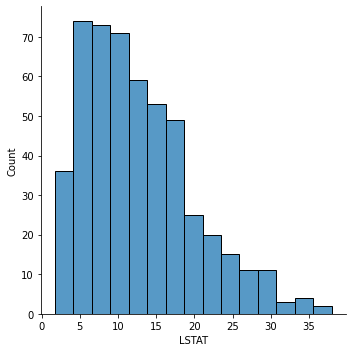

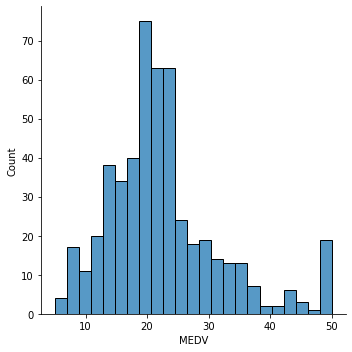

In [15]:
for i in boston.columns:
    sns.displot(boston[i])

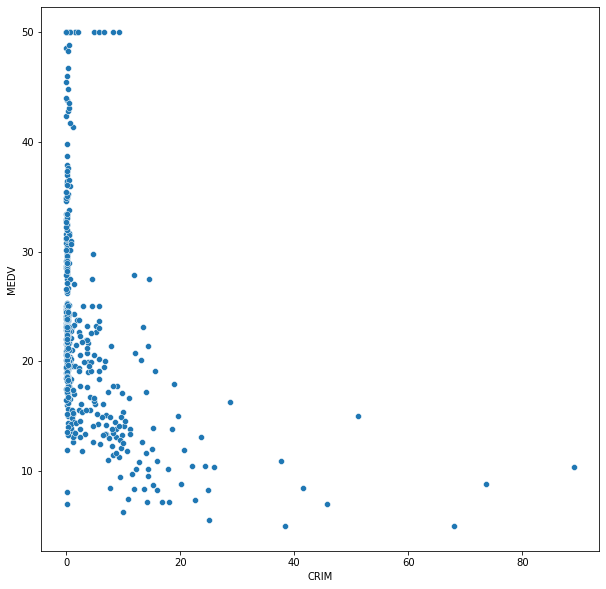

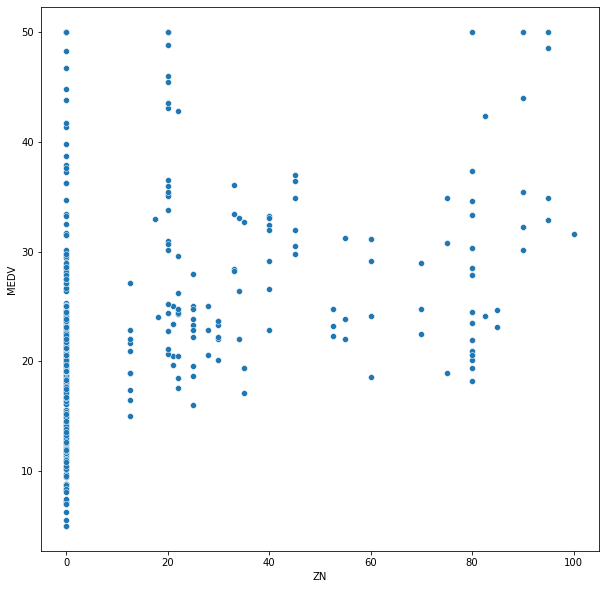

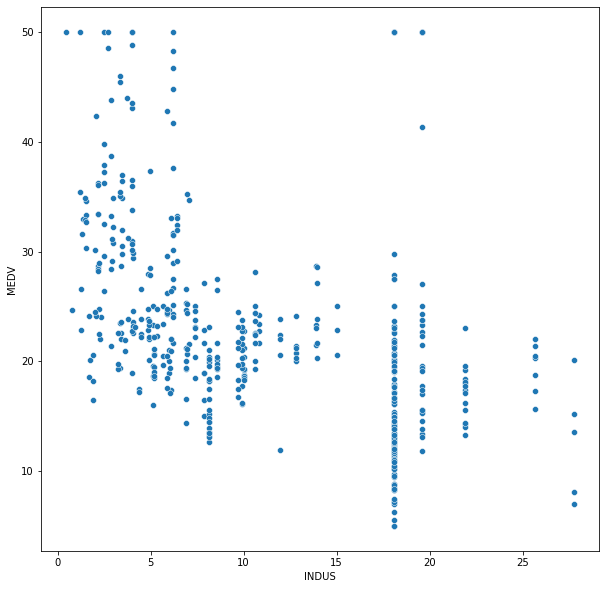

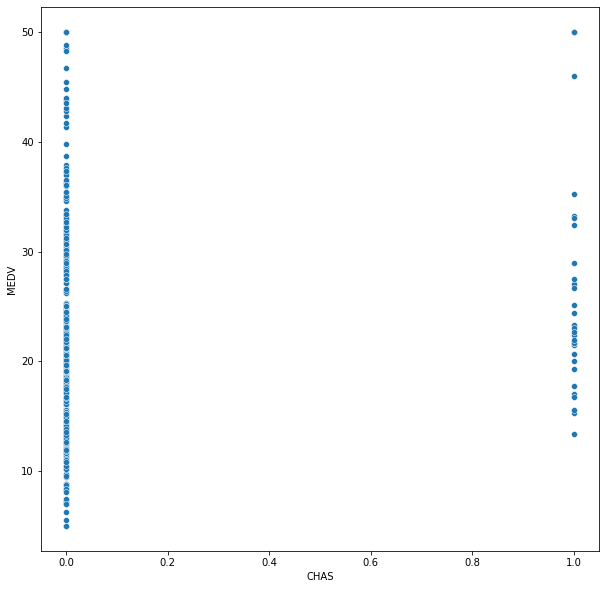

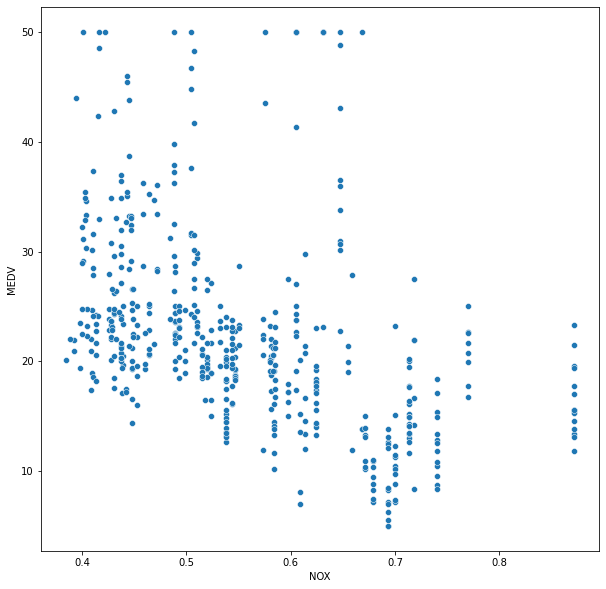

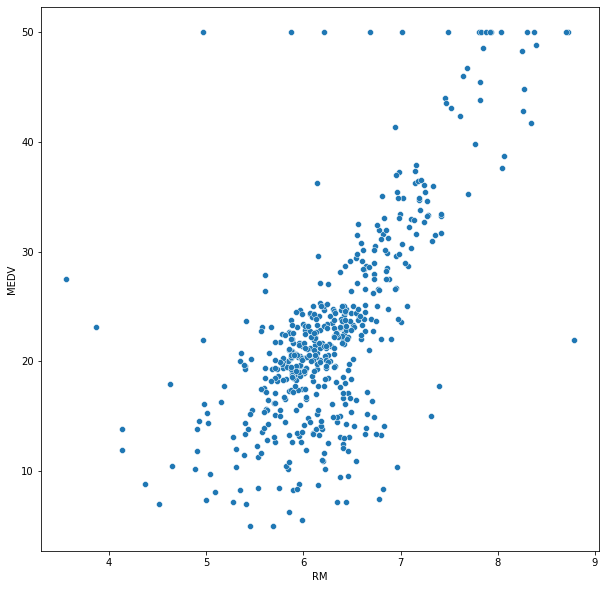

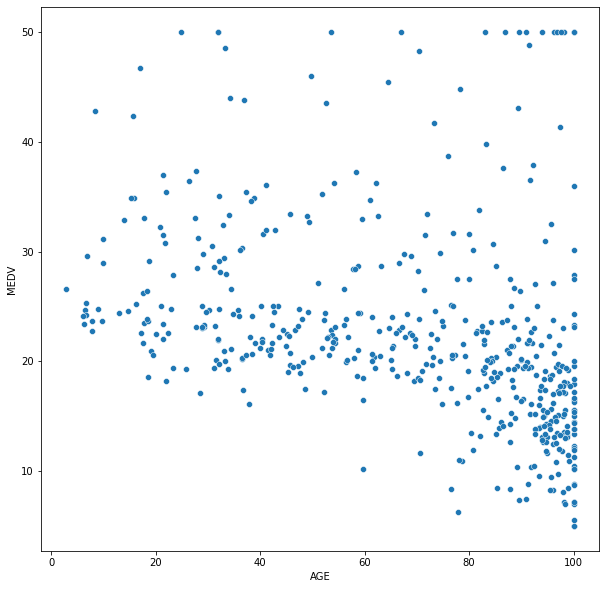

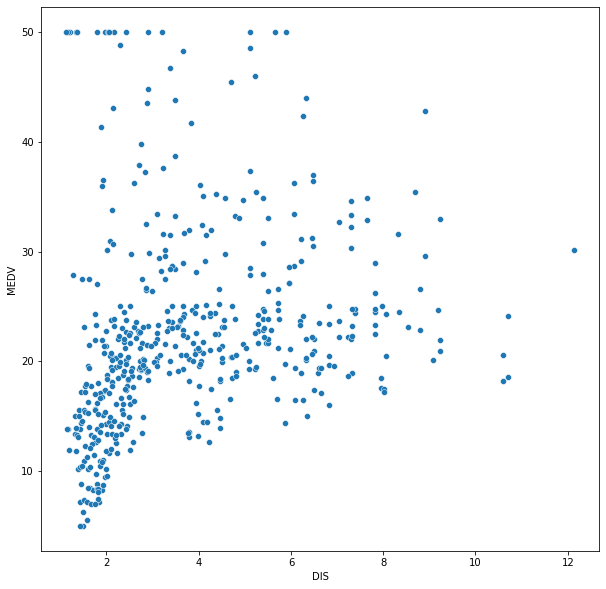

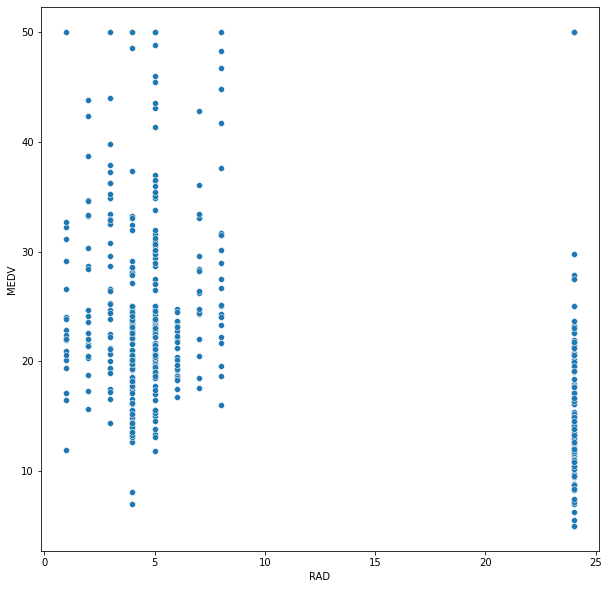

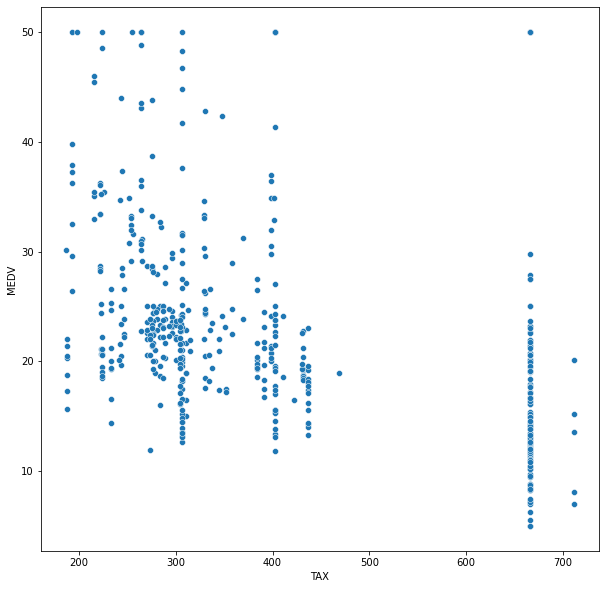

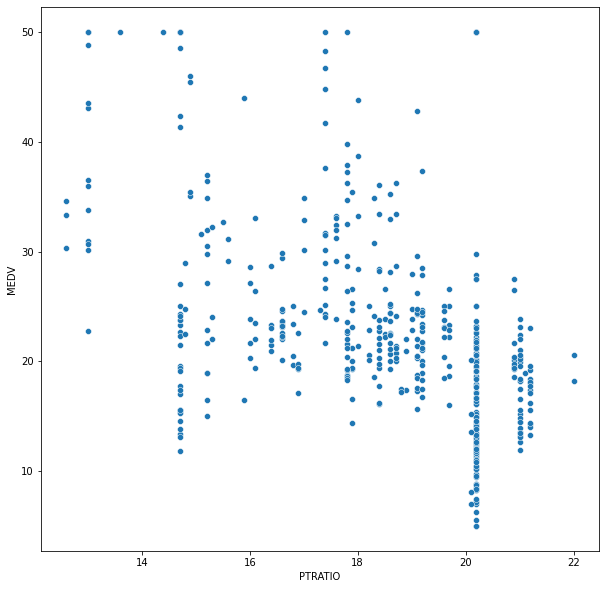

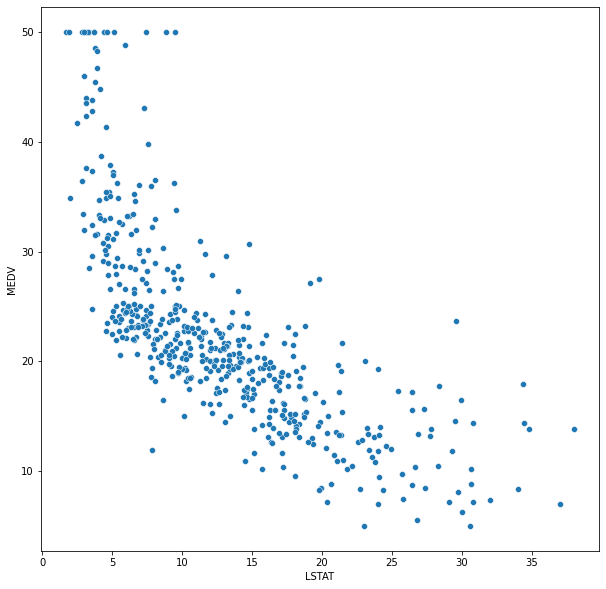

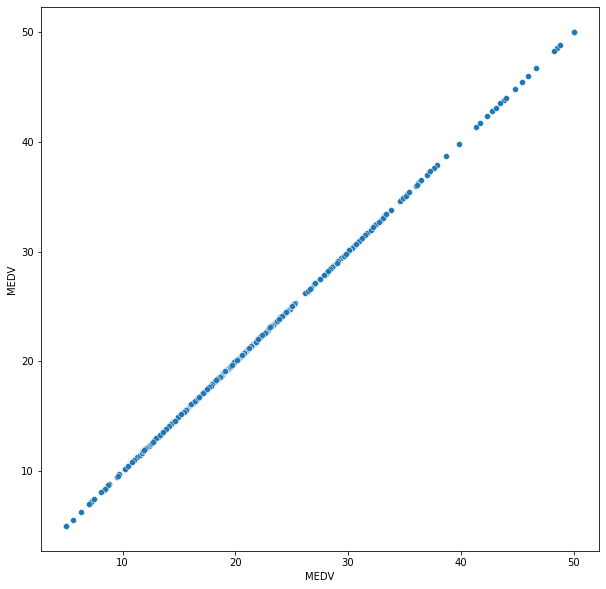

In [22]:
# for i in boston.columns:
#     sns.scatterplot(x = boston[i], y= boston['MEDV'])
for i in boston.columns:
    plt.figure(figsize = (10,10))
    sns.scatterplot(x = boston[i], y = boston['MEDV'])
    plt.show()  

**Get the Correlation Heatmap**

<AxesSubplot:>

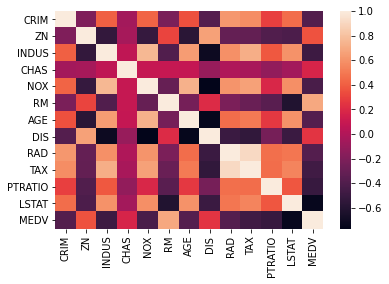

In [23]:
sns.heatmap(boston.corr())

In [25]:
# Let us create a new feature using the TAX and RAD.
boston['Rad/Tax'] = boston['RAD']/boston['TAX']

### <a id = "link2">Split the dataset</a>
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [27]:
X = boston.drop(['MEDV'], axis=1)
y = boston[['MEDV']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### <a id = "link3">Using Linear Model from Scikit learn library</a>

**Fit the model to the training set**

In [29]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

**Get the score on training set**

In [30]:
linreg.score(X_train, y_train)

0.7077132931309869

**Write your own function for the r-squared score**

**Get the score on test set**

In [31]:
linreg.score(X_test, y_test)

0.7747487100790016

**Get the RMSE on test set**

**Get model Coefficients**

**Automate the equation of the fit**

## <a id = "link4">Bonus: Using Statsmodels OLS</a>

**Make the linear model using OLS**

**Get the value of coefficient of determination**

**Get the Predictions on test set**

**Calculate MSE for training set**

**Get the RMSE on training set**

**Get the RMSE on test set**